# Creating FAO Agro Maps per crop

This notebook uses input data from <a href="http://www.fao.org/land-water/land/land-governance/land-resources-planning-toolbox/category/details/en/c/1026341/">FAO Agro Maps</a>. The scope is to extract all crops available at the desired resolution (admin level 2) merge with spatial admin layer and produce output that can later on be used in the downscaling process.

**Original code:** [Alexandros Korkovelos](https://github.com/akorkovelos) <br />
**Conceptualization & Methodological review :** [Alexandros Korkovelos](https://github.com/akorkovelos) <br />
**Updates, Modifications:** [Alexandros Korkovelos](https://github.com/akorkovelos)<br />
**Funding:** The World Bank (contract number: 7190531), [KTH](https://www.kth.se/en/itm/inst/energiteknik/forskning/desa/welcome-to-the-unit-of-energy-systems-analysis-kth-desa-1.197296)

In [202]:
# Import necessary modules and libraries

# Part 1
import pandas as pd
import os

# Part 2
import geopandas as gpd
import matplotlib.pyplot as plt
import pyproj
from shapely.geometry import Point, Polygon
%matplotlib inline

## Part 1. Creating csv files per crop

In [203]:
# Import data 

path = r"N:\Agrodem\Downscaling\Input_Data\vectors\FAO_Agro_Map\moz"
name_of_file = "moz_all_data.csv"

In [204]:
# Import csv as pandas dataframe
df = pd.read_csv(path + "\\" + name_of_file)
df = df.drop(["CONTINENT_CODE", "CONTINENT_NAME"], axis=1)

In [205]:
print ("The number of administrative areas (level 2) is {}, as shown below:".format(df.AREA_NAME.nunique()))
df.AREA_NAME.unique()

The number of administrative areas (level 2) is 134, as shown below:


array(['Cabo Delgado', 'Gaza', 'Inhambane', 'Manica', 'Maputo', 'Nampula',
       'Nassa', 'Sofala', 'Tete', 'Zambezia', 'Ancuabe', 'Balama',
       'Chiure', 'Macomia', 'Mecufi', 'Meluco', 'Mocimboa da Praia',
       'Montepuez', 'Mueda', 'Muidumbe', 'Namuno', 'Nangade', 'Palma',
       'Pemba', 'Quissanga', 'Bilene', 'Chibuto', 'Chicualacuala',
       'Chigubo', 'Chokwe', 'Guija', 'Mabalane', 'Mandlakazi',
       'Massangena', 'Massingir', 'Xai-Xai', 'Funhalouro', 'Govuro',
       'Homoine', 'Inharrime', 'Inhassoro', 'Jangamo', 'Mabote',
       'Massinga', 'Morrumbene', 'Panda', 'Vilanculos', 'Zavala', 'Barue',
       'Gondola', 'Guro', 'Machaze', 'Macossa', 'Mossurize',
       'Sussundenga', 'Tambara', 'Boane', 'Magude', 'Manhica',
       'Marracuene', 'Matutuine', 'Moamba', 'Namaacha', 'Angoche',
       'Erati', 'Lalaua', 'Malema', 'Meconta', 'Mecuburi', 'Memba',
       'Mogovolas', 'Moma', 'Monapo', 'Mongincual', 'Mossuril', 'Muecate',
       'Murrupula', 'Nacala Velha', 'Ribaue',

<div class="alert alert-block alert-warning">
<b>Note_1:</b> According to the <a href="http://www.fao.org/land-water/land/land-governance/land-resources-planning-toolbox/category/details/en/c/1026341/">data source</a> the most recent year for which admin level 2 data for harvested area are availavle, is the year 2000. 
</div>

In [206]:
print ("The number of crops is {}, as shown below:".format(df.ITEM_NAME.nunique()))
df.ITEM_NAME.unique()

The number of crops is 31, as shown below:


array(['Sweet Potatoes', 'Cassava', 'Yams', 'Sugar Cane', 'Beans, Dry',
       'Peas, Dry', 'Cow Peas, Dry', 'Soybeans', 'Groundnuts in Shell',
       'Sunflower Seed', 'Rice, Paddy', 'Sesame Seed', 'Seed Cotton',
       'Cabbages', 'Tomatoes', 'Pumpkins, Squash, Gourds',
       'Cucumbers and Gherkins', 'Onions, Dry', 'Beans, Green', 'Carrots',
       'Maize', 'Watermelons', 'Tea', 'Pimento, Allspice', 'Ginger',
       'Sisal', 'Millet', 'Tobacco Leaves', 'Sorghum', 'Lettuce',
       'Garlic'], dtype=object)

<div class="alert alert-block alert-warning">
<b>Note_2:</b> According to the <a href="http://www.fao.org/land-water/land/land-governance/land-resources-planning-toolbox/category/details/en/c/1026341/">data source</a> the crops for which admin level 2 data for harvested area are availavle include Maize, Cassava, Dry Beans and Rice Paddy. Therefore we only focus on these crops.
</div>

### Extracting crop data per admin 2 to unique datarames

#### Maize

In [207]:
# Select crop and data as per availability
df_maize_2000_admin2 = df[(df['AEREA_HARVESTED'].notnull()) & 
                          (df['AEREA_HARVESTED'] > 0) &
                          (df['ITEM_NAME'] == "Maize") & 
                          (df['YEAR'] == "2000") &
                          (df['ADMIN_LEVEL'] == 2)]

# Calculate total harvested area
Maize_harv_area_ha_2000 = df_maize_2000_admin2["AEREA_HARVESTED"].sum()
print("\033[1m" + "Total harvested area for Maize under the selected parameters is:", Maize_harv_area_ha_2000, "ha")

# Other stats on the dataset
df_maize_2000_admin2.describe()

Total harvested area for Maize under the selected parameters is: 769013.0 ha


,ADMIN_LEVEL,ITEM_CODE,AEREA_HARVESTED,YIELD,PRODUCTION
count,87.0,87.0,87.000000,0.0,86.000000
mean,2.0,56.0,8839.229885,NaN,7983.848837
std,0.0,0.0,8204.625623,NaN,10510.934520
min,2.0,56.0,626.000000,NaN,0.000000
25%,2.0,56.0,3343.000000,NaN,1582.500000
50%,2.0,56.0,6732.000000,NaN,4314.000000
75%,2.0,56.0,11380.500000,NaN,9692.750000
max,2.0,56.0,45340.000000,NaN,67655.000000


In [208]:
# Estimate share of harvested area per admin_2 level (this will be used later for projection)
df_maize_2000_admin2["Admin_2_share"] = df_maize_2000_admin2["AEREA_HARVESTED"] / Maize_harv_area_ha_2000

C:\Users\adm.esa\Anaconda3\envs\OSMNX\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Projection to 2017-18 values based on [FAOSTAT](http://www.fao.org/faostat/en/#data/QC)

This code uses most updated vales for harvested area aggragated at national level, and distributes the values to admin 2 level sistricts based on shares estimated in previous steps. This method has of course caveats however, is the best available alternative in the absence of higher granularity data.

In [209]:
# This is the value retrieved from the source
Maize_harv_area_ha_2017 = 1830368

df_maize_2000_admin2["Area_Harv_2017"] = df_maize_2000_admin2["Admin_2_share"] * Maize_harv_area_ha_2017

C:\Users\adm.esa\Anaconda3\envs\OSMNX\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [210]:
df_maize_2000_admin2

,COUNTRY_CODE,COUNTRY_NAME,AREA_CODE,AREA_NAME,ADMIN_LEVEL,ITEM_CODE,ITEM_NAME,YEAR,AEREA_HARVESTED,YIELD,PRODUCTION,Admin_2_share,Area_Harv_2017
1771,MOZ,Mozambique,MOZ001009,Mueda,2,56,Maize,2000,3108.0,NaN,2455.0,0.004042,7397.513103
1804,MOZ,Mozambique,MOZ001010,Muidumbe,2,56,Maize,2000,2167.0,NaN,1560.0,0.002818,5157.789863
2266,MOZ,Mozambique,MOZ002009,Massangena,2,56,Maize,2000,1208.0,NaN,1094.0,0.001571,2875.223883
2365,MOZ,Mozambique,MOZ003001,Funhalouro,2,56,Maize,2000,776.0,NaN,453.0,0.001009,1846.998124
2398,MOZ,Mozambique,MOZ003002,Govuro,2,56,Maize,2000,3110.0,NaN,2678.0,0.004044,7402.273408
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5528,MOZ,Mozambique,MOZ010012,Morrumbala,2,56,Maize,2000,31034.0,NaN,31034.0,0.040356,73865.644029
5561,MOZ,Mozambique,MOZ010013,Namacurra,2,56,Maize,2000,2862.0,NaN,1775.0,0.003722,6811.995657
5594,MOZ,Mozambique,MOZ010014,Namarroi,2,56,Maize,2000,1821.0,NaN,1421.0,0.002368,4334.257195
5627,MOZ,Mozambique,MOZ010015,Nicoadala,2,56,Maize,2000,1630.0,NaN,685.0,0.002120,3879.648120


#### Cassava

In [211]:
df_cassava_2000_admin2 = df[(df['AEREA_HARVESTED'].notnull()) & 
                          (df['AEREA_HARVESTED'] > 0) &
                          (df['ITEM_NAME'] == "Cassava") & 
                          (df['YEAR'] == "2000")&
                          (df['ADMIN_LEVEL'] == 2)]

# Calculate total harvested area
Cassava_harv_area_ha_2000 = df_cassava_2000_admin2["AEREA_HARVESTED"].sum()
print("\033[1m" + "Total harvested area for Cassava under the selected parameters is:", Cassava_harv_area_ha_2000, "ha")

# Other stats on the dataset
df_cassava_2000_admin2.describe()

Total harvested area for Cassava under the selected parameters is: 633858.0 ha


,ADMIN_LEVEL,ITEM_CODE,AEREA_HARVESTED,YIELD,PRODUCTION
count,72.0,72.0,72.000000,0.0,72.000000
mean,2.0,125.0,8803.583333,NaN,50846.430556
std,0.0,0.0,10231.411564,NaN,60731.578013
min,2.0,125.0,201.000000,NaN,4.000000
25%,2.0,125.0,691.500000,NaN,3315.750000
50%,2.0,125.0,3721.500000,NaN,21957.000000
75%,2.0,125.0,14724.500000,NaN,86874.000000
max,2.0,125.0,44958.000000,NaN,265253.000000


In [212]:
# Estimate share of harvested area per admin_2 level (this will be used later for projection)
df_cassava_2000_admin2["Admin_2_share"] = df_cassava_2000_admin2["AEREA_HARVESTED"] / Cassava_harv_area_ha_2000

C:\Users\adm.esa\Anaconda3\envs\OSMNX\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Projection to 2017-18 values based on [FAOSTAT](http://www.fao.org/faostat/en/#data/QC)

This code uses most updated vales for harvested area aggragated at national level, and distributes the values to admin 2 level sistricts based on shares estimated in previous steps. This method has of course caveats however, is the best available alternative in the absence of higher granularity data.

In [213]:
# This is the value retrieved from the source
Cassava_harv_area_ha_2017 = 1070377

df_cassava_2000_admin2["Area_Harv_2017"] = df_cassava_2000_admin2["Admin_2_share"] * Cassava_harv_area_ha_2017

C:\Users\adm.esa\Anaconda3\envs\OSMNX\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [214]:
df_cassava_2000_admin2

,COUNTRY_CODE,COUNTRY_NAME,AREA_CODE,AREA_NAME,ADMIN_LEVEL,ITEM_CODE,ITEM_NAME,YEAR,AEREA_HARVESTED,YIELD,PRODUCTION,Admin_2_share,Area_Harv_2017
2341,MOZ,Mozambique,MOZ003001,Funhalouro,2,125,Cassava,2000,1145.0,NaN,5459.0,0.001806,1933.527170
2374,MOZ,Mozambique,MOZ003002,Govuro,2,125,Cassava,2000,533.0,NaN,2250.0,0.000841,900.061119
2407,MOZ,Mozambique,MOZ003003,Homoine,2,125,Cassava,2000,201.0,NaN,166.0,0.000317,339.422674
2440,MOZ,Mozambique,MOZ003004,Inharrime,2,125,Cassava,2000,5858.0,NaN,28073.0,0.009242,9892.228963
2473,MOZ,Mozambique,MOZ003005,Inhassoro,2,125,Cassava,2000,7991.0,NaN,39037.0,0.012607,13494.162110
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5504,MOZ,Mozambique,MOZ010012,Morrumbala,2,125,Cassava,2000,21485.0,NaN,126764.0,0.033896,36281.075328
5537,MOZ,Mozambique,MOZ010013,Namacurra,2,125,Cassava,2000,14024.0,NaN,82744.0,0.022125,23681.908326
5570,MOZ,Mozambique,MOZ010014,Namarroi,2,125,Cassava,2000,15872.0,NaN,93648.0,0.025040,26802.570519
5603,MOZ,Mozambique,MOZ010015,Nicoadala,2,125,Cassava,2000,7825.0,NaN,46165.0,0.012345,13213.842888


#### Dry Beans

In [215]:
df_dryBeans_2000_admin2 = df[(df['AEREA_HARVESTED'].notnull()) & 
                          (df['AEREA_HARVESTED'] > 0) &
                          (df['ITEM_NAME'] == "Beans, Dry") & 
                          (df['YEAR'] == "2000")&
                          (df['ADMIN_LEVEL'] == 2)]

# Calculate total harvested area
DryBeans_harv_area_ha_2000 = df_dryBeans_2000_admin2["AEREA_HARVESTED"].sum()
print("\033[1m" + "Total harvested area for Dry Beans under the selected parameters is:", DryBeans_harv_area_ha_2000, "ha")

# Other stats on the dataset
df_dryBeans_2000_admin2.describe()

Total harvested area for Dry Beans under the selected parameters is: 241897.0 ha


,ADMIN_LEVEL,ITEM_CODE,AEREA_HARVESTED,YIELD,PRODUCTION
count,88.0,88.0,88.000000,0.0,0.0
mean,2.0,176.0,2748.829545,NaN,NaN
std,0.0,0.0,2603.593053,NaN,NaN
min,2.0,176.0,56.000000,NaN,NaN
25%,2.0,176.0,1022.250000,NaN,NaN
50%,2.0,176.0,2110.500000,NaN,NaN
75%,2.0,176.0,3926.500000,NaN,NaN
max,2.0,176.0,15030.000000,NaN,NaN


In [216]:
# Estimate share of harvested area per admin_2 level (this will be used later for projection)
df_dryBeans_2000_admin2["Admin_2_share"] = df_dryBeans_2000_admin2["AEREA_HARVESTED"] / DryBeans_harv_area_ha_2000

C:\Users\adm.esa\Anaconda3\envs\OSMNX\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Projection to 2017-18 values based on [FAOSTAT](http://www.fao.org/faostat/en/#data/QC)

This code uses most updated vales for harvested area aggragated at national level, and distributes the values to admin 2 level sistricts based on shares estimated in previous steps. This method has of course caveats however, is the best available alternative in the absence of higher granularity data.

In [217]:
# This is the value retrieved from the source
DryBeans_harv_area_ha_2017 = 100000

df_dryBeans_2000_admin2["Area_Harv_2017"] = df_dryBeans_2000_admin2["Admin_2_share"] * DryBeans_harv_area_ha_2017

C:\Users\adm.esa\Anaconda3\envs\OSMNX\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [218]:
df_dryBeans_2000_admin2

,COUNTRY_CODE,COUNTRY_NAME,AREA_CODE,AREA_NAME,ADMIN_LEVEL,ITEM_CODE,ITEM_NAME,YEAR,AEREA_HARVESTED,YIELD,PRODUCTION,Admin_2_share,Area_Harv_2017
2349,MOZ,Mozambique,MOZ003001,Funhalouro,2,176,"Beans, Dry",2000,406.0,NaN,NaN,0.001678,167.840031
2382,MOZ,Mozambique,MOZ003002,Govuro,2,176,"Beans, Dry",2000,1600.0,NaN,NaN,0.006614,661.438546
2415,MOZ,Mozambique,MOZ003003,Homoine,2,176,"Beans, Dry",2000,402.0,NaN,NaN,0.001662,166.186435
2448,MOZ,Mozambique,MOZ003004,Inharrime,2,176,"Beans, Dry",2000,6892.0,NaN,NaN,0.028491,2849.146538
2481,MOZ,Mozambique,MOZ003005,Inhassoro,2,176,"Beans, Dry",2000,3073.0,NaN,NaN,0.012704,1270.375408
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5512,MOZ,Mozambique,MOZ010012,Morrumbala,2,176,"Beans, Dry",2000,4775.0,NaN,NaN,0.019740,1973.980661
5545,MOZ,Mozambique,MOZ010013,Namacurra,2,176,"Beans, Dry",2000,1431.0,NaN,NaN,0.005916,591.574100
5578,MOZ,Mozambique,MOZ010014,Namarroi,2,176,"Beans, Dry",2000,2342.0,NaN,NaN,0.009682,968.180672
5611,MOZ,Mozambique,MOZ010015,Nicoadala,2,176,"Beans, Dry",2000,1304.0,NaN,NaN,0.005391,539.072415


#### Rice paddy

In [219]:
df_rice_2000_admin2 = df[(df['AEREA_HARVESTED'].notnull()) & 
                          (df['AEREA_HARVESTED'] > 0) &
                          (df['ITEM_NAME'] == "Rice, Paddy") & 
                          (df['YEAR'] == "2000")&
                          (df['ADMIN_LEVEL'] == 2)]

# Calculate total harvested area
Rice_harv_area_ha_2000 = df_rice_2000_admin2["AEREA_HARVESTED"].sum()
print("\033[1m" + "Total harvested area for Rice under the selected parameters is:", Rice_harv_area_ha_2000, "ha")

# Other stats on the dataset
df_rice_2000_admin2.describe()

Total harvested area for Rice under the selected parameters is: 107761.0 ha


,ADMIN_LEVEL,ITEM_CODE,AEREA_HARVESTED,YIELD,PRODUCTION
count,56.0,56.0,56.000000,0.0,54.000000
mean,2.0,27.0,1924.303571,NaN,1579.851852
std,0.0,0.0,3280.118556,NaN,3683.624499
min,2.0,27.0,62.000000,NaN,0.000000
25%,2.0,27.0,380.250000,NaN,48.000000
50%,2.0,27.0,789.500000,NaN,292.000000
75%,2.0,27.0,1829.500000,NaN,1235.000000
max,2.0,27.0,20214.000000,NaN,24256.000000


In [220]:
# Estimate share of harvested area per admin_2 level (this will be used later for projection)
df_rice_2000_admin2["Admin_2_share"] = df_rice_2000_admin2["AEREA_HARVESTED"] / Rice_harv_area_ha_2000

C:\Users\adm.esa\Anaconda3\envs\OSMNX\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Projection to 2017-18 values based on [FAOSTAT](http://www.fao.org/faostat/en/#data/QC)

This code uses most updated vales for harvested area aggragated at national level, and distributes the values to admin 2 level sistricts based on shares estimated in previous steps. This method has of course caveats however, is the best available alternative in the absence of higher granularity data.

In [221]:
# This is the value retrieved from the source
Rice_harv_area_ha_2017 = 142749

df_rice_2000_admin2["Area_Harv_2017"] = df_rice_2000_admin2["Admin_2_share"] * Rice_harv_area_ha_2017

C:\Users\adm.esa\Anaconda3\envs\OSMNX\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [222]:
df_rice_2000_admin2

,COUNTRY_CODE,COUNTRY_NAME,AREA_CODE,AREA_NAME,ADMIN_LEVEL,ITEM_CODE,ITEM_NAME,YEAR,AEREA_HARVESTED,YIELD,PRODUCTION,Admin_2_share,Area_Harv_2017
1631,MOZ,Mozambique,MOZ001005,Mecufi,2,27,"Rice, Paddy",2000,1678.0,NaN,0.0,0.015571,2222.815508
1796,MOZ,Mozambique,MOZ001010,Muidumbe,2,27,"Rice, Paddy",2000,1608.0,NaN,0.0,0.014922,2130.087805
2456,MOZ,Mozambique,MOZ003004,Inharrime,2,27,"Rice, Paddy",2000,345.0,NaN,5111.0,0.003202,457.015108
2489,MOZ,Mozambique,MOZ003005,Inhassoro,2,27,"Rice, Paddy",2000,307.0,NaN,0.0,0.002849,406.677212
2555,MOZ,Mozambique,MOZ003007,Mabote,2,27,"Rice, Paddy",2000,517.0,NaN,0.0,0.004798,684.860321
2621,MOZ,Mozambique,MOZ003009,Morrumbene,2,27,"Rice, Paddy",2000,595.0,NaN,NaN,0.005521,788.185475
2649,MOZ,Mozambique,MOZ003010,Panda,2,27,"Rice, Paddy",2000,194.0,NaN,93.0,0.001800,256.988205
2781,MOZ,Mozambique,MOZ004002,Gondola,2,27,"Rice, Paddy",2000,326.0,NaN,0.0,0.003025,431.846160
2913,MOZ,Mozambique,MOZ004006,Manica,2,27,"Rice, Paddy",2000,540.0,NaN,0.0,0.005011,715.327994
2946,MOZ,Mozambique,MOZ004007,Mossurize,2,27,"Rice, Paddy",2000,306.0,NaN,2917.0,0.002840,405.352530


### Exporting crop dataframes into separate csv

This part exports the csv files for the crops identified. These csv files can be used in a GIS environment (e.g. Qgis) and be merged with the admin 2 layer. In case you want to proceed and perform this here using geopandas, please proceed to the following steps.

In [223]:
## Define output path
#path = r"\\ug.kth.se\dfs\home\a\l\alekor\appdata\xp.V2\Desktop\Testing code"
#
#df_maize_2000_admin2.to_csv(os.path.join(path,"{c}.csv".format(c="Moz_Maize_2000_admin2")))
#df_cassava_2000_admin2.to_csv(os.path.join(path,"{c}.csv".format(c="Moz_Cassava_2000_admin2")))
#df_dryBeans_2000_admin2.to_csv(os.path.join(path,"{c}.csv".format(c="Moz_DryBeans_2000_admin2")))
#df_rice_2000_admin2.to_csv(os.path.join(path,"{c}.csv".format(c="Moz_RicePaddy_2000_admin2")))

## Part 2. Performing spatial join (merge) using geopandas

### Import admin 2 layer

In this case this is a shapefile, but other formats can be accepted here.

In [224]:
path_shp = r"N:\Agrodem\Downscaling\Input_Data\vectors\FAO_Agro_Map\moz"
name_shp = "moz_2.shp"
admin_2_gdf = gpd.read_file(path_shp + "\\" + name_shp)

In [225]:
admin_2_gdf.columns

Index(['parent', 'adm0_name', 'code', 'name', 'level', 'geometry'], dtype='object')

### Renaming dfs

First, we need to rename the admin_2 column name in the previous dataframes in order to match with the "merging" column in the imported shapefile.

In [226]:
df_maize_2000_admin2.rename(columns={"AREA_NAME":"name"}, inplace=True)
df_cassava_2000_admin2.rename(columns={"AREA_NAME":"name"}, inplace=True)
df_dryBeans_2000_admin2.rename(columns={"AREA_NAME":"name"}, inplace=True)
df_rice_2000_admin2.rename(columns={"AREA_NAME":"name"}, inplace=True)

C:\Users\adm.esa\Anaconda3\envs\OSMNX\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


### Creating unique gdfs per crop

In [227]:
admin_2_maize_gdf = admin_2_gdf.merge(df_maize_2000_admin2, on="name")
admin_2_cassava_gdf = admin_2_gdf.merge(df_cassava_2000_admin2, on="name")
admin_2_drybeans_gdf = admin_2_gdf.merge(df_dryBeans_2000_admin2, on="name")
admin_2_rice_gdf = admin_2_gdf.merge(df_rice_2000_admin2, on="name")

### Cross-checking estimated

Calculating total area per district and cross-checking that projected harvested ara (as per method above) does not surpasses physical limits. Areas in ha.

#### Maize

harv_area_2017_ha

In [228]:
admin_2_maize_gdf["tot_dist_area_ha"] = admin_2_maize_gdf['geometry'].to_crs({'init': 'epsg:32737'})\
                .map(lambda p: p.area / 10**4)
admin_2_maize_gdf["Test"] = admin_2_maize_gdf["tot_dist_area_ha"] > admin_2_maize_gdf["Area_Harv_2017"]
admin_2_maize_gdf["Test"].unique

<bound method Series.unique of 0     True
1     True
2     True
3     True
4     True
      ... 
82    True
83    True
84    True
85    True
86    True
Name: Test, Length: 87, dtype: bool>

In [229]:
# Adding new column for the share of harvested area over the total area per district
admin_2_maize_gdf["harv_share_of_tot"] = admin_2_maize_gdf["Area_Harv_2017"] / admin_2_maize_gdf["tot_dist_area_ha"]

#### Cassava

In [230]:
admin_2_cassava_gdf["tot_dist_area_ha"] = admin_2_cassava_gdf['geometry'].to_crs({'init': 'epsg:32737'})\
                .map(lambda p: p.area / 10**4)
admin_2_cassava_gdf["Test"] = admin_2_cassava_gdf["tot_dist_area_ha"] > admin_2_cassava_gdf["Area_Harv_2017"]
admin_2_cassava_gdf["Test"].unique

<bound method Series.unique of 0     True
1     True
2     True
3     True
4     True
      ... 
67    True
68    True
69    True
70    True
71    True
Name: Test, Length: 72, dtype: bool>

In [231]:
# Adding new column for the share of harvested area over the total area per district
admin_2_cassava_gdf["harv_share_of_tot"] = admin_2_cassava_gdf["Area_Harv_2017"] / admin_2_cassava_gdf["tot_dist_area_ha"]

#### Dry Beans

In [232]:
admin_2_drybeans_gdf["tot_dist_area_ha"] = admin_2_drybeans_gdf['geometry'].to_crs({'init': 'epsg:32737'})\
                .map(lambda p: p.area / 10**4)
admin_2_drybeans_gdf["Test"] = admin_2_drybeans_gdf["tot_dist_area_ha"] > admin_2_drybeans_gdf["Area_Harv_2017"]
admin_2_drybeans_gdf["Test"].unique

<bound method Series.unique of 0     True
1     True
2     True
3     True
4     True
      ... 
83    True
84    True
85    True
86    True
87    True
Name: Test, Length: 88, dtype: bool>

In [233]:
# Adding new column for the share of harvested area over the total area per district
admin_2_drybeans_gdf["harv_share_of_tot"] = admin_2_drybeans_gdf["Area_Harv_2017"] / admin_2_drybeans_gdf["tot_dist_area_ha"]

#### Rice (paddy)

In [234]:
admin_2_rice_gdf["tot_dist_area_ha"] = admin_2_rice_gdf['geometry'].to_crs({'init': 'epsg:32737'})\
                .map(lambda p: p.area / 10**4)
admin_2_rice_gdf["Test"] = admin_2_rice_gdf["tot_dist_area_ha"] > admin_2_rice_gdf["Area_Harv_2017"]
admin_2_rice_gdf["Test"].unique

<bound method Series.unique of 0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
26    True
27    True
28    True
29    True
30    True
31    True
32    True
33    True
34    True
35    True
36    True
37    True
38    True
39    True
40    True
41    True
42    True
43    True
44    True
45    True
46    True
47    True
48    True
49    True
50    True
51    True
52    True
53    True
54    True
55    True
Name: Test, dtype: bool>

In [235]:
# Adding new column for the share of harvested area over the total area per district
admin_2_rice_gdf["harv_share_of_tot"] = admin_2_rice_gdf["Area_Harv_2017"] / admin_2_rice_gdf["tot_dist_area_ha"]

### Cleaning the gdfs

In [236]:
admin_2_maize_gdf.columns

Index(['parent', 'adm0_name', 'code', 'name', 'level', 'geometry',
       'COUNTRY_CODE', 'COUNTRY_NAME', 'AREA_CODE', 'ADMIN_LEVEL', 'ITEM_CODE',
       'ITEM_NAME', 'YEAR', 'AEREA_HARVESTED', 'YIELD', 'PRODUCTION',
       'Admin_2_share', 'Area_Harv_2017', 'tot_dist_area_ha', 'Test',
       'harv_share_of_tot'],
      dtype='object')

In [237]:
# Maize
admin_2_maize_gdf.rename(columns={"COUNTRY_NAME":"country",
                                  "COUNTRY_CODE":"country_code",
                                  "name":"admin2",
                                  "ITEM_NAME":"crop",
                                  "AEREA_HARVESTED":"harea_2000_ha",
                                  "YIELD":"yield",
                                  "YEAR":"year",
                                  "PRODUCTION":"product_ha",
                                  "Admin_2_share": "shareofsum",
                                  "Area_Harv_2017":"harv_area_ha",
                                  "tot_dist_area_ha":"district_area_ha",
                                  "harv_share_of_tot":"shareofdistrict"}, inplace=True)

admin_2_maize_gdf = admin_2_maize_gdf.drop(["parent","adm0_name","code","level","ADMIN_LEVEL","ITEM_CODE","AREA_CODE", "Test"], axis=1)

# Cassava
admin_2_cassava_gdf.rename(columns={"COUNTRY_NAME":"country",
                                  "COUNTRY_CODE":"country_code",
                                  "name":"admin2",
                                  "ITEM_NAME":"crop",
                                  "AEREA_HARVESTED":"harea_2000_ha",
                                  "YIELD":"yield",
                                  "YEAR":"year",
                                  "PRODUCTION":"product_ha",
                                  "Admin_2_share": "shareofsum",
                                  "Area_Harv_2017":"harv_area_ha",
                                  "tot_dist_area_ha":"district_area_ha",
                                  "harv_share_of_tot":"shareofdistrict"}, inplace=True)

admin_2_cassava_gdf = admin_2_cassava_gdf.drop(["parent","adm0_name","code","level","ADMIN_LEVEL","ITEM_CODE","AREA_CODE","Test"], axis=1)

# Dry Beans
admin_2_drybeans_gdf.rename(columns={"COUNTRY_NAME":"country",
                                  "COUNTRY_CODE":"country_code",
                                  "name":"admin2",
                                  "ITEM_NAME":"crop",
                                  "AEREA_HARVESTED":"harea_2000_ha",
                                  "YIELD":"yield",
                                  "YEAR":"year",
                                  "PRODUCTION":"product_ha", 
                                  "Admin_2_share": "shareofsum",
                                  "Area_Harv_2017":"harv_area_ha",
                                  "tot_dist_area_ha":"district_area_ha",
                                  "harv_share_of_tot":"shareofdistrict"}, inplace=True)

admin_2_drybeans_gdf = admin_2_drybeans_gdf.drop(["parent","adm0_name","code","level","ADMIN_LEVEL","ITEM_CODE","AREA_CODE","Test"], axis=1)

# Rice Paddy
admin_2_rice_gdf.rename(columns={"COUNTRY_NAME":"country",
                                  "COUNTRY_CODE":"country_code",
                                  "name":"admin2",
                                  "ITEM_NAME":"crop",
                                  "AEREA_HARVESTED":"harea_ha",
                                  "YIELD":"yield",
                                  "YEAR":"year",
                                  "PRODUCTION":"product_ha",
                                  "Admin_2_share": "shareofsum",
                                  "Area_Harv_2017":"harv_area_ha",
                                  "tot_dist_area_ha":"district_area_ha",
                                  "harv_share_of_tot":"shareofdistrict"}, inplace=True)

admin_2_rice_gdf = admin_2_rice_gdf.drop(["parent","adm0_name","code","level","ADMIN_LEVEL","ITEM_CODE","AREA_CODE","Test"], axis=1)



### Quick visualization of results

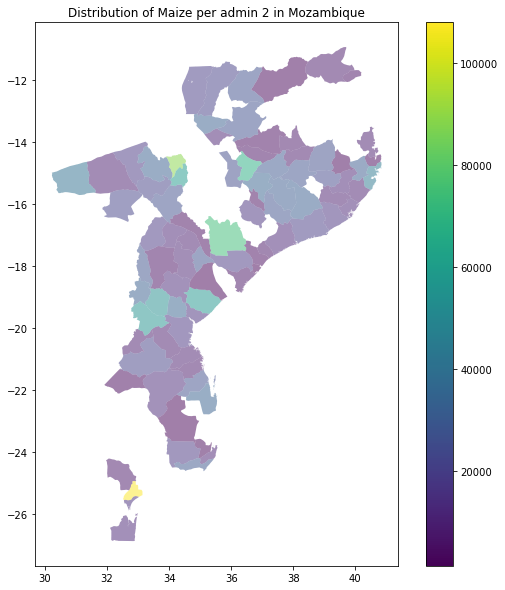

In [238]:
#Maize

# Create the axis first
fig, ax = plt.subplots(figsize=(10, 10))

# Plot all crops
admin_2_maize_gdf.sort_values('harv_area_ha', ascending=True).plot(
    ax=ax, column='harv_area_ha', legend=True, alpha=0.5)

# Make figure aspect ratio ensure that 10x10 km square appears square
ax.set_aspect('equal', 'box')
txt = ax.set_title('Distribution of {} per admin 2 in Mozambique'.format("Maize"))

# Save plot as figure 
plt.savefig('Maize_Harv_Area_2017.png', bbox_inches='tight')

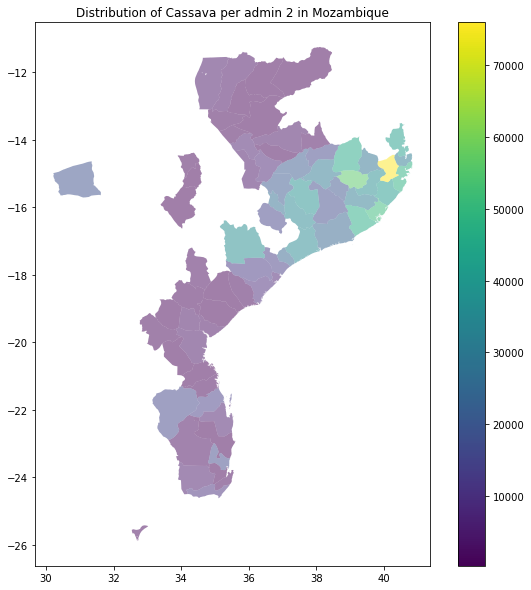

In [239]:
# Cassava

# Create the axis first
fig, ax = plt.subplots(figsize=(10, 10))

# Plot all crops
admin_2_cassava_gdf.sort_values('harv_area_ha', ascending=True).plot(
    ax=ax, column='harv_area_ha', legend=True, alpha=0.5)

# Make figure aspect ratio ensure that 10x10 km square appears square
ax.set_aspect('equal', 'box')
txt = ax.set_title('Distribution of {} per admin 2 in Mozambique'.format("Cassava"))

# Save plot as figure 
plt.savefig('Cassava_Harv_Area_2017.png', bbox_inches='tight')

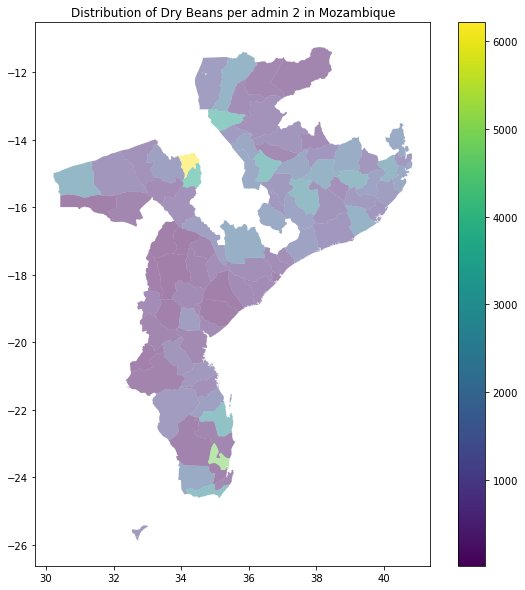

In [240]:
# Dry Beans

# Create the axis first
fig, ax = plt.subplots(figsize=(10, 10))

# Plot all crops
admin_2_drybeans_gdf.sort_values('harv_area_ha', ascending=True).plot(
    ax=ax, column='harv_area_ha', legend=True, alpha=0.5)

# Make figure aspect ratio ensure that 10x10 km square appears square
ax.set_aspect('equal', 'box')
txt = ax.set_title('Distribution of {} per admin 2 in Mozambique'.format("Dry Beans"))

# Save plot as figure 
plt.savefig('DryBeans_Harv_Area_2017.png', bbox_inches='tight')

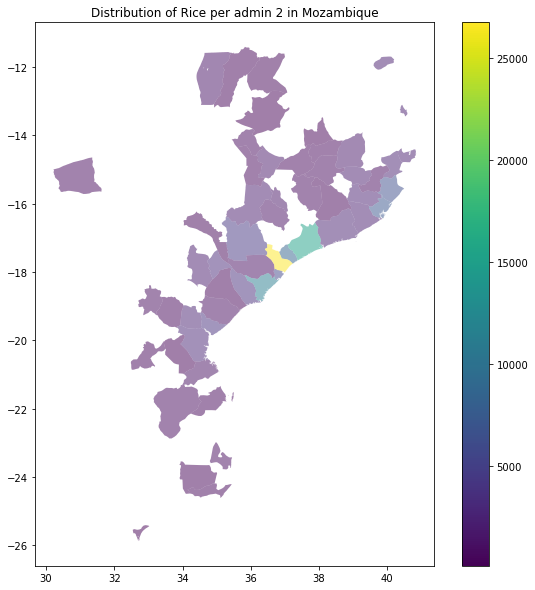

In [241]:
# Rice

# Create the axis first
fig, ax = plt.subplots(figsize=(10, 10))

# Plot all crops
admin_2_rice_gdf.sort_values('harv_area_ha', ascending=True).plot(
    ax=ax, column='harv_area_ha', legend=True, alpha=0.5)

# Make figure aspect ratio ensure that 10x10 km square appears square
ax.set_aspect('equal', 'box')
txt = ax.set_title('Distribution of {} per admin 2 in Mozambique'.format("Rice"))

# Save plot as figure 
plt.savefig('Rice_Harv_Area_2017.png', bbox_inches='tight')

### Exporting gdfs to shapefiles (shp)

In [242]:
# Define output path
path = r"N:\Agrodem\Downscaling\Output_Data\Crop_Maps"

#Maize
admin_2_maize_gdf.to_file(os.path.join(path,"{c}.shp".format(c="Moz_Maize_2017_admin2")))

#Cassava
admin_2_cassava_gdf.to_file(os.path.join(path,"{c}.shp".format(c="Moz_Cassava_2017_admin2")))

#Dry beans
admin_2_drybeans_gdf.to_file(os.path.join(path,"{c}.shp".format(c="Moz_drybeans_2017_admin2")))

#Rice paddy
admin_2_rice_gdf.to_file(os.path.join(path,"{c}.shp".format(c="Moz_rice_2017_admin2")))